In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Flight_Price.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,date,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,2023-01-01,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,2023-04-01,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,2023-01-07,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,2023-03-25,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,2023-01-01,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,2023-02-01,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,2023-02-28,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,2023-03-02,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,2023-03-21,81585


In [5]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'date', 'price'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,date,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,2023-01-01,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,2023-04-01,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,2023-01-07,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,2023-03-25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,2023-01-01,5955


In [8]:
df.shape

(300153, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   date              300153 non-null  object 
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 25.2+ MB


In [10]:
df['date']=pd.to_datetime(df['date'])

ParserError: Unknown string format: #REF! present at position 91

In [14]:
row_index=91
df.at[row_index, 'date']

'2023-02-21'

In [15]:
wer = df[df['date']=='#REF!']['date']
wer 

300152    #REF!
Name: date, dtype: object

In [17]:
df['date'].value_counts()

2023-02-03    3443
2023-02-17    3436
2023-01-19    3434
2023-03-17    3433
2023-03-24    3409
              ... 
2023-01-05    3232
2023-01-29    3229
2023-02-16    3201
2023-04-01       1
#REF!            1
Name: date, Length: 92, dtype: int64

In [18]:
index_row=300152  
df = df.drop(index=index_row)

In [19]:
df['date'].value_counts()

2023-02-03    3443
2023-02-17    3436
2023-01-19    3434
2023-03-17    3433
2023-03-24    3409
              ... 
2023-01-13    3245
2023-01-05    3232
2023-01-29    3229
2023-02-16    3201
2023-04-01       1
Name: date, Length: 91, dtype: int64

In [20]:
df['date']=pd.to_datetime(df['date'])

In [23]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300152 entries, 0 to 300151
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   airline           300152 non-null  int32         
 1   flight            300152 non-null  int32         
 2   source_city       300152 non-null  int32         
 3   departure_time    300152 non-null  int32         
 4   stops             300152 non-null  int32         
 5   arrival_time      300152 non-null  int32         
 6   destination_city  300152 non-null  int32         
 7   class             300152 non-null  int32         
 8   duration          300152 non-null  float64       
 9   date              300152 non-null  datetime64[ns]
 10  price             300152 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(8), int64(1)
memory usage: 16.0 MB


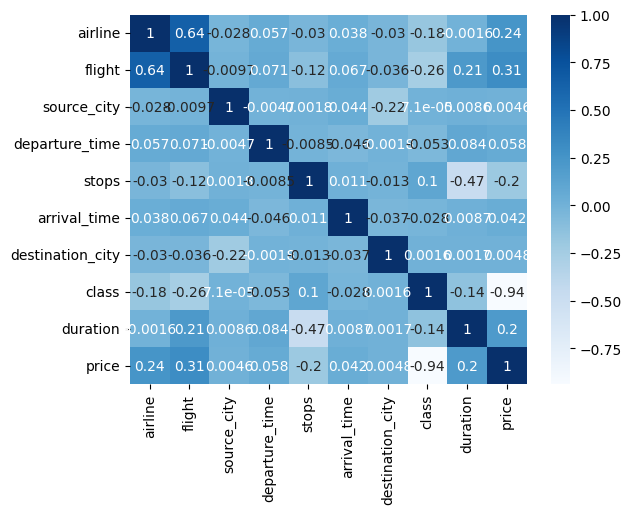

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [29]:
# No significant multi-colinearity

In [37]:
x = df.drop(['price','date'],axis=1)
y = df['price']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=35)

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
dtr.score(x_test,y_test)

0.9762435492008611

In [41]:
y_pred = dtr.predict(x_test)

In [42]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
r2score*100

97.6243549200861

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr_y_pred = lr.predict(x_test)
lr_r2score = r2_score(y_test,lr_y_pred)
lr_r2score*100

89.87279541135288

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
rf_y_pred = rf_regressor.predict(x_test) 
rf_r2score = r2_score(y_test,rf_y_pred)
rf_r2score*100

97.65902448411296